Make sure to set the runtime to GPU: Runtime -> Change runtime type -> T4 GPU

You can upload your own images, then change the relevant code cells to load it and send it through the model.

In [6]:
# install the intrinsic decomposition repo from github
!pip install https://github.com/compphoto/Intrinsic/archive/main.zip

Defaulting to user installation because normal site-packages is not writeable
  Using cached https://github.com/compphoto/Intrinsic/archive/main.zip
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/CCareaga/MiDaS (to revision master) to /tmp/pip-install-e5m7_21p/altered-midas_e222e56023b946ee8c4f2fbfb8daca16
  Running command git clone --filter=blob:none --quiet https://github.com/CCareaga/MiDaS /tmp/pip-install-e5m7_21p/altered-midas_e222e56023b946ee8c4f2fbfb8daca16
  Resolved https://github.com/CCareaga/MiDaS to commit 2d85a1393147e3b86b827f80a2f57ca0fa7e0a86
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/CCareaga/chrislib (to revision main) to /tmp/pip-install-e5m7_21p/chrislib_78940ed8e8eb4ebfba5cf9fc21d02cfb
  Running command git clone --filter=blob:none --quiet https://github.com/CCareaga/chrislib /tmp/pip-install-e5m7_21p/chrislib_78940ed8e8eb4ebfba5cf9fc21d02cfb
  Resolved https://github.com/CCareaga/chrislib to commit 667ddf1853683cf

In [10]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# import some helper functions from chrislib (will be installed by the intrinsic repo)
from chrislib.general import show, view, uninvert
from chrislib.data_util import load_image

# import model loading and running the pipeline
from intrinsic.pipeline import run_pipeline
from intrinsic.model_util import load_models

In [2]:
# download the pretrained weights and return the model (may take a bit to download weights)
intrinsic_model = load_models('paper_weights')

Using cache found in /home/richamis/.cache/torch/hub/facebookresearch_WSL-Images_main
Using cache found in /home/richamis/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


In [3]:
# load an example image from the github repo
torch.hub.download_url_to_file('https://raw.githubusercontent.com/compphoto/Intrinsic/main/figures/avocado.png', 'avo.png')
torch.hub.download_url_to_file('https://p0.pikist.com/photos/124/344/sweet-peppers-paprika-green-yellow-red-healthy-vitamins-pepper-vegetables.jpg', 'paprika.jpg')

100%|██████████| 2.85M/2.85M [00:00<00:00, 35.7MB/s]
100%|██████████| 48.6k/48.6k [00:00<00:00, 6.14MB/s]


In [5]:
# load the image to run through the pipeline
img = load_image('./paprika.jpg')

In [6]:
# run the image through the pipeline (use R0 resizing dicussed in the paper)
result = run_pipeline(
    intrinsic_model,
    img,
    resize_conf=0.0,
    maintain_size=True,
    linear=False,
    device='cuda'
)

In [7]:
# convert the inverse shading to regular shading for visualization
shd = uninvert(result['inv_shading'])
alb = result['albedo']

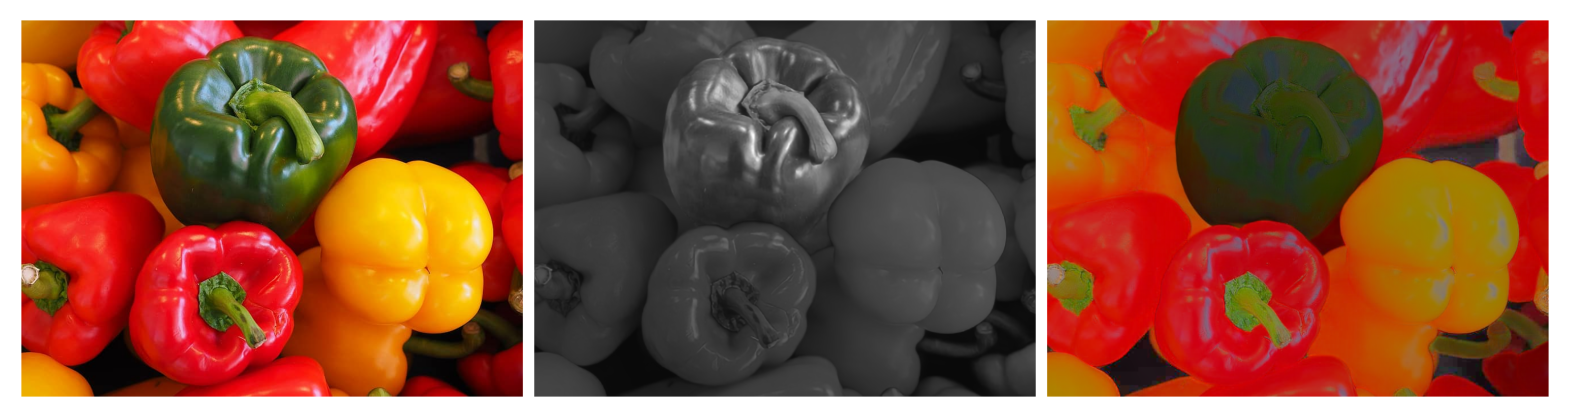

In [8]:
# show the result (gamma corrects the linear intrinsic components and scales to [0-1])
show([img, view(shd), view(alb)], size=(20, 7))

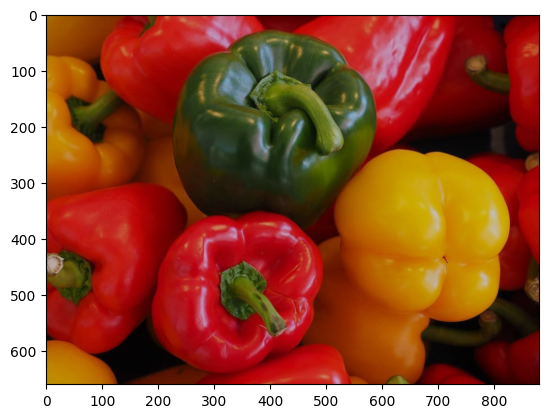

In [70]:
plt.imshow(view(alb)*view(shd)[:,:,None]*4)

In [17]:
alb[100, 400, :]

array([0.02571341, 0.05080523, 0.06435355], dtype=float32)

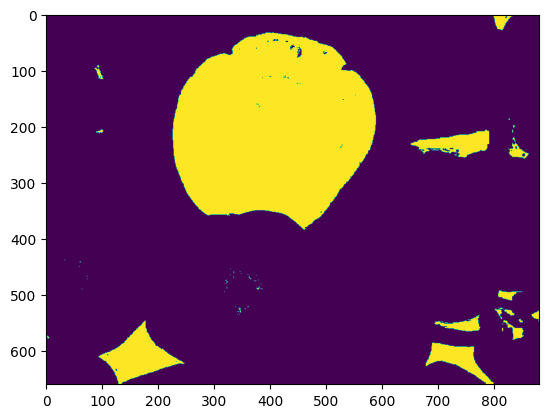

In [59]:
new_alb = alb.copy()

mask1 = new_alb[:,:,0]<65/255 #and new_alb[:,:,1]<65/255# and new_alb[:,:,0]>20 and new_alb[:,:,1]>20
mask2 = new_alb[:,:,0]<17/255
mask3 = mask1*mask2
fig = plt.figure()
plt.imshow(mask3)



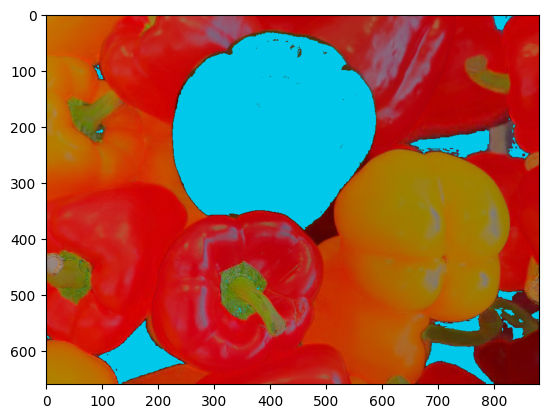

In [62]:
new_alb[mask3] = np.array([0,181,255])/255
plt.imshow(view(new_alb))

In [80]:
view(shd).max(), view(shd).min(), shd.max(), shd.min()

(1.0, 0.034973886, 28.419039, 0.01777649)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


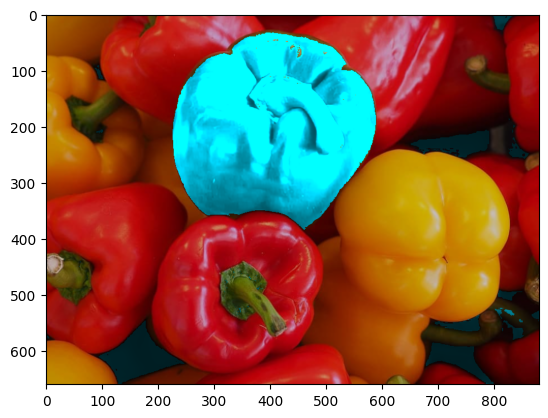

In [93]:
import matplotlib.pyplot as plt
plt.imshow(view(new_alb)*(view(shd[:,:,None]))*4)   

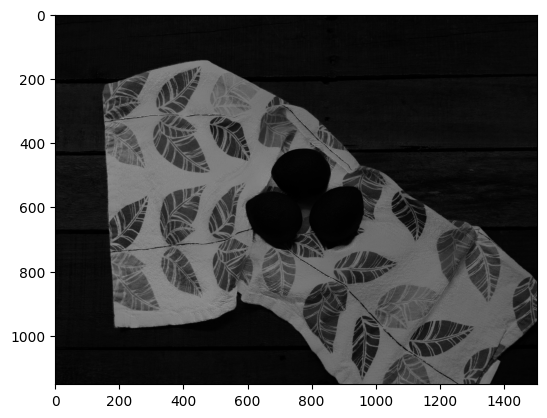

In [27]:
plt.imshow(alb_gray, cmap='gray')

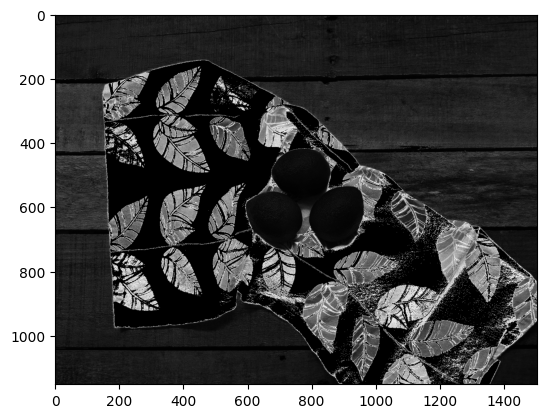

In [36]:
alb_gray[alb_gray>0.4] = 0
plt.imshow(alb_gray, cmap='gray')
r, c = np.where(alb_gray > 0.4)

550608


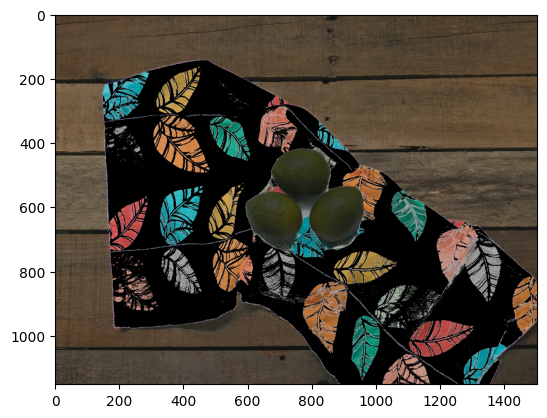

In [64]:
alb_gray = alb.sum(-1)
alb_gray = (alb_gray - alb_gray.min())/(alb_gray.max() - alb_gray.min())
r, c = np.where(alb_gray > 0.3)

alb_recolor = alb.copy()
print(len(r))

alb_recolor[r, c, :] = 0
plt.imshow(view(alb_recolor))

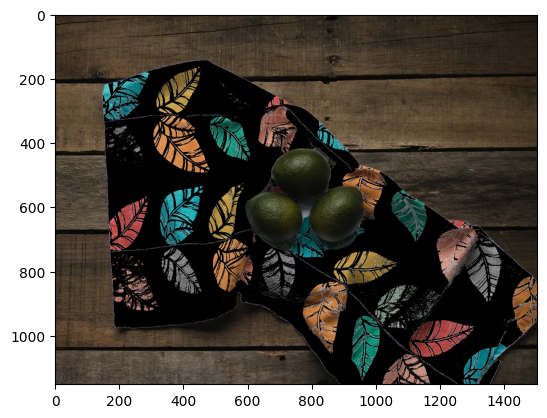

In [62]:
plt.imshow(view(alb_recolor)*view(shd)[:,:,None]*2.2)